# Matemática simbólica  con Sympy

[Sympy](http://www.sympy.org/en/index.html) suele describirse como:

> "... un módulo o librería de Python para la matemática simbólica."

Esto significa que puede usarse para:

- Manipular expresiones simbólicas;
- Resolver ecuaciones simbólicas;
- Llevar a cabo cálculos simbólicos ;
- Dibujar funciones definidas de manera simbólica.

Por supuesto que también tiene otras muchas capacidades en las que no entraremos en este notebook, pero que podrán consultarse en la ayuda online del módulo: http://www.sympy.org/en/index.html

## Manipulando expresiones simbólicas

Antes de que podeamos empezar a usar este módulo (o librería/biblioteca) para manipular cualquier tipo de expresión, necesitaremos importarlo.

In [1]:
# Existen diferentes posibilidades de importar este o cualquier otro módulo de Python
import sympy as sym    # esta sería una de las más estandard en este caso concreto

De esta manera se ha importado el módulo integrando sus funciones y métodos (o procedimientos) en nuestro espacio general de nombres sin más que anteponer el prefijo `sym` que es uno de los más usados.


Así pues, si ahora nosotros queremos que Python compruebe la expresión simbólica trivial $x - x = 0$ (sea cual sea el símbolo $x$), obtendríamos un error si previamente no le indicamos a Python que $x$ realmente se trata de un símbolo.

In [2]:
x - x

NameError: name 'x' is not defined

Y para eso Sympy tiene pues una forma concreta de indicarle a Python justo eso, que $x$ es una  variable simbólica:

In [3]:
x = sym.symbols('x')

Ya sí que podemos calcular $x - x$ con propiedad:

In [4]:
x - x

0

De esta manera ya podemos crear y manipular expresiones simbólicas en Sympy. Verifiquemos por ejemplo que:

$$(a + b) ^ 2 = a ^ 2 + 2ab + b ^2$$

Para ello, en primer lugar deberemos crear las variables simbólicas $a, b$:

In [6]:
a, b = sym.symbols('a, b')

y a continuación construimos una de las expresiones de la igualdad que queremos verificar:

In [7]:
expr = (a + b) ** 2 
expr

(a + b)**2

**Nótese** que en todo momento también podemos hacer que Sympy devuelva dicha expresión formateada como lo haría un compilador de $\LaTeX$, de manera que la salida correspondiente dentro del notebook sea lo más bonita y elegante posible:

In [20]:
sym.init_printing()      # esta sería la forma de indicárselo a SymPy

In [22]:
expr

In [23]:
sym.latex(expr)

'\\left(a + b\\right)^{2}'

Ahora procederemos a expandir nuestra expresión:

In [12]:
sym.expand(expr)

Equivalentemente podríamos escribir simplemente

In [10]:
expr.expand() 

gracias a que como `expr` es una expresión simbólica, automáticamente Python interpreta que el procedimiento que se aplica a continuación debe estar dentro de SymPy

Nótese que también podemos conseguir que Sympy produzca el correspondiente código $\LaTeX$ por si lo necesitáramos en el futuro:

In [24]:
sym.latex(expr.expand())

'a^{2} + 2 a b + b^{2}'

---
**EJERCICIO** Use Sympy para verificar las siguientes expresiones:

- $(a - b) ^ 2 = a ^ 2 - 2 a b + b^2$
- $a ^ 2 - b ^ 2 = (a - b) (a + b)$ (en vez de usar `expand`, pruebe con `factor`)

## Resolviendo ecuaciones simbólicas 

Podemos usar también Sympy para resolver ecuaciones de manera simbólica. Por ejemplo, busquemos la solución en $x$ de la ecuación cuadrática:

$$a x ^ 2 + b x + c = 0$$

In [25]:
# En realidad ya sólo nos faltaría definir como símbolo `c`, pero por estar seguros, haremos
a, b, c, x = sym.symbols('a, b, c, x')  

Y el comando de Sympy para resolver ecuaciones es `solveset`. El primer argumento es una expresión para la que vamos a buscar las raíces o soluciones. El segundo argumento es la variable simbólica en la que vamos a resolver dicha ecuación.

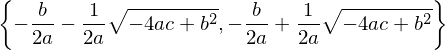

In [26]:
sym.solveset(a * x ** 2 + b * x + c, x)

---
**EJERCICIO** Use ahora Sympy para encontrar las soluciones de la ecuación genérica de grado 3:

$$a x ^ 3 + b x ^ 2 + c  x + d = 0$$

---

Es posible pasarle más argumentos a `solveset` para limitar por ejemplo el espacio de soluciones. Veámos por ejemplo cuál es son en general las soluciones de la siguiente ecuación:  $$x^2=-1$$
y posteriormente busquemos más concretamente sólo las que estén en $\mathbb{R}$ 

In [27]:
sym.solveset(x ** 2 + 1, x)

In [28]:
sym.solveset(x ** 2 + 1, x, domain=sym.S.Reals)

---
**EJERCICIO** Use Sympy para encontrar las soluciones de las siguientes ecuaciones:

- $x ^ 2 == 2$ en $\mathbb{N}$;
- $x ^ 3 + 2 x = 0$ en $\mathbb{R}$.

---

##  Cálculo Simbólico

Por supuesto que también podemos usar Sympy para calcular límites. Calculemos por ejemplo:

$$\lim_{x\to 0^+}\frac{1}{x}$$

In [29]:
sym.limit(1/x, x, 0, dir="+")

---
**EJERCICIO** Calcule los límites siguientes:

1. $\lim_{x\to 0^-}\frac{1}{x}$
2.  $\lim_{x\to 0}\frac{1}{x^2}$

---

Ahora usaremos Sympy para derivar e integrar. Experimentemos primero derivando la siguiente expresión:

$$x ^ 2 - \cos(x)$$

In [30]:
sym.diff(x ** 2 - sym.cos(x), x)

Similarmente podemos integrarla:

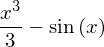

In [31]:
sym.integrate(x ** 2 - sym.cos(x), x)

Y si necesitamos calcular integrales definidas :

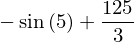

In [32]:
sym.integrate(x ** 2 - sym.cos(x), (x, 0, 5))

---

**EJERCICIOS** Use Sympy para calcular:

1. $\frac{d\sin(x ^2)}{dx}$
2. $\frac{d(x ^2 + xy - \ln(y))}{dy}$
3. $\int e^x \cos(x)\;dx$
4. $\int_0^5 e^{2x}\;dx$

## Dibujando con Sympy

Finalmente veremos que también Sympy nos puede servir para dibujar funciones. Para ello haremos uso del módulo por excelencia para dibujar con Python, que se llama [matplotlib](http://matplotlib.org/). Y aunque en principio también SymPy podría realizar gráficos de funciones directamente, sin hacer uso de `matplotlib`, se recomienda usarlo ya que este módulo de dibujo con Python es de lo más potente y versátil, como ya tendrá oportunidad de comprobar si mira su [documentación](https://matplotlib.org/contents.html) o la [galería](https://matplotlib.org/gallery/index.html) de gráficos disponibles


Pero antes de poder visualizar via Jupyter estos gráficos necesitaremos correr cierto comando para que éstos aparezcan en línea, incrustados en el propio notebook, y no en una ventana emergente:

In [33]:
%matplotlib inline

Dibujemos simplemente $x^2$:

In [40]:
?sym.plot

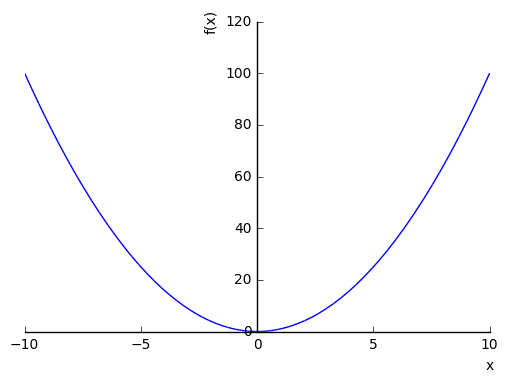

In [37]:
expr = x ** 2
p = sym.plot(expr);

Nótese, que por defecto se ha tomado el intervalo $[-10,10]$ para dicha representación.  directly save that plot to a file if we wish to:

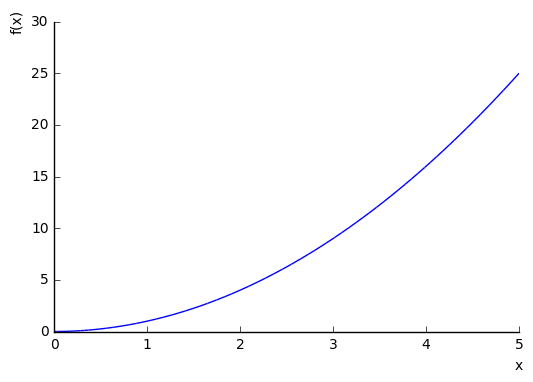

In [42]:
pbis = sym.plot(expr,(x,0,5));

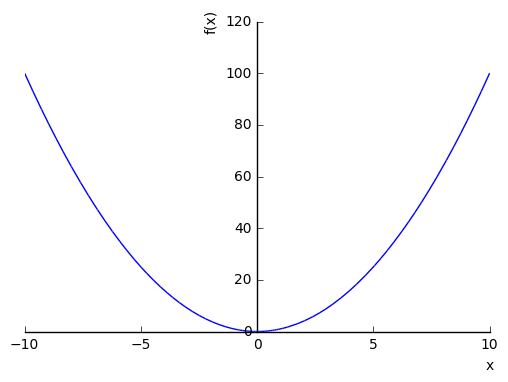

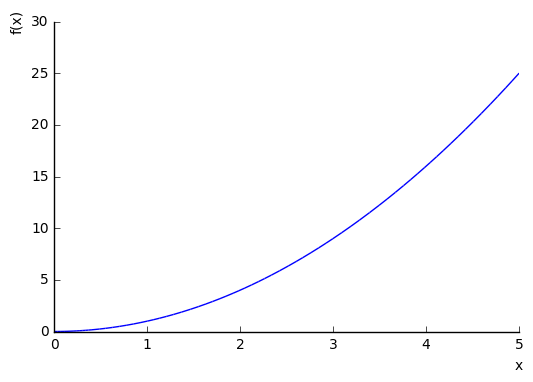

In [43]:
p.save("parabola.pdf");
pbis.save("semiparabola.pdf");

In [44]:
ls *.pdf

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: B86C-57D6

 Directorio de C:\Users\Pedro\Downloads\Python-Mathematics-Handbook-master

28/09/2018  00:31             8.437 parabola.pdf
28/09/2018  00:31             7.338 semiparabola.pdf
28/09/2018  00:14             8.406 x_squared.pdf
               3 archivos         24.181 bytes
               0 dirs  17.229.123.584 bytes libres


---
**EJERCICIO** Dibuje las siguientes funciones:

- $y=x + cos(x)$
- $y=x ^ 2 - e^x$ (aquí se podría usar `ylim` como un argumento útil; consultar la documentación)

Experimente también con varios dominios de definición, opciones gráficas y distintos formatos de fichero a la hora de grabar los correspondientes gráficos.

---

## Resumen

En esta sección hemos discutido cómo se puede usar Sympy para:

- Manipular expresiones simbólicas;
- Calcular límites, derivadas e integrales;
- Dibujar expresiones simbólicas.  
    
Pero esto no es más que una pequeña parte de lo que Sympy puede hacer.